In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

print(tf.__version__)

1.12.0


In [3]:
def read_fashion_mnist_dataset():
    fashion_mnist = keras.datasets.fashion_mnist
    (train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
    train_images = train_images / 255.0
    test_images = test_images / 255.0
    class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
    dataset_description = (train_images, train_labels), (test_images, test_labels), class_names
    return dataset_description

In [4]:
def visualise_fashion_mnist_dataset():
    plt.figure(figsize=(10,10))
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(train_images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[train_labels[i]])

In [5]:
def build_model(input_shape, network_layers, tf_activation_funcs, tf_optimizer, tf_loss, tf_metrics):
    assert(len(network_layers) == len(tf_activation_funcs))
    
    model = keras.Sequential()
    
    model.add(keras.layers.Flatten(input_shape=input_shape))
    
    for i in range(len(network_layers)):
        model.add(keras.layers.Dense(network_layers[i], activation=tf_activation_funcs[i]))

    model.compile(optimizer=tf_optimizer, loss=tf_loss, metrics=tf_metrics)
    
    return model

In [6]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks(range(10), class_names, rotation=45)
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


In [7]:
def plot_random_predictions(test_images, test_labels, predictions):
    index = random.randint(0, test_images.shape[0] - 1)
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    plot_image(index, predictions, test_labels, test_images)
    plt.subplot(1,2,2)
    plot_value_array(index, predictions, test_labels)

In [18]:
def plot_train_val_curve(history, title, subplot_tuple):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    train_loss = hist['loss'].values
    val_loss = hist['val_loss'].values
    plt.subplot(*subplot_tuple)
    plt.title(title)
    plt.xlabel("epochs")
    plt.ylabel("loss")
    plt.plot(train_loss, label="train loss")
    plt.plot(val_loss, label="val loss")
    plt.legend()

In [9]:
def evaluate_on_test_set(model, model_name, test_images, test_labels):
    test_loss, test_acc = model.evaluate(test_images, test_labels)
    print('Test accuracy for ' + model_name + ':', test_acc)
    print('Test loss for ' + model_name + ':', test_loss)
    predictions = model.predict(test_images)
    return predictions

In [12]:
dataset_description = read_fashion_mnist_dataset()
(train_images, train_labels), (test_images, test_labels), class_names = dataset_description

print("Train Shape: " + str(train_images.shape))
print("Train label Shape: " + str(train_labels.shape))
print("Test Shape: " + str(test_images.shape))
print("Test label Shape: " + str(test_labels.shape))

# visualise_fashion_mnist_dataset()

input_shape = (train_images.shape[1], train_images.shape[2])
network_layers = [30, 7, 10]
tf_activation_funcs = ['relu', 'relu', 'softmax']
tf_loss = 'sparse_categorical_crossentropy'
tf_metrics = ['accuracy']
num_epochs = 5
val_split = 0.2

tf_gd_optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
gd_model = build_model(input_shape, network_layers, tf_activation_funcs, tf_gd_optimizer, tf_loss, tf_metrics)
print("Training gradient descent optimizer")
gd_history = gd_model.fit(train_images, train_labels, epochs=num_epochs, validation_split=val_split)
gd_preds = evaluate_on_test_set(gd_model, 'gradient descent optimizer', test_images, test_labels)

tf_adadelta_optimizer = tf.train.AdadeltaOptimizer()
adadelta_model = build_model(input_shape, network_layers, tf_activation_funcs, tf_adadelta_optimizer, tf_loss, tf_metrics)
print("Training adadelta optimizer")
adadelta_history = adadelta_model.fit(train_images, train_labels, epochs=num_epochs, validation_split=val_split)
adadelta_preds = evaluate_on_test_set(adadelta_model, 'adadelta optimizer', test_images, test_labels)

tf_adagrad_optimizer = tf.train.AdagradOptimizer(learning_rate=0.001)
adagrad_model = build_model(input_shape, network_layers, tf_activation_funcs, tf_adagrad_optimizer, tf_loss, tf_metrics)
print("Training adagrad optimizer")
adagrad_history = adagrad_model.fit(train_images, train_labels, epochs=num_epochs, validation_split=val_split)
adagrad_preds = evaluate_on_test_set(adagrad_model, 'adagrad optimizer', test_images, test_labels)

tf_adam_optimizer = tf.train.AdamOptimizer()
adam_model = build_model(input_shape, network_layers, tf_activation_funcs, tf_adam_optimizer, tf_loss, tf_metrics)
print("Training adam optimizer")
adam_history = adam_model.fit(train_images, train_labels, epochs=num_epochs, validation_split=val_split)
adam_preds = evaluate_on_test_set(adam_model, 'adam optimizer', test_images, test_labels)

tf_rmsprop_optimizer = tf.train.RMSPropOptimizer(learning_rate=0.001)
rmsprop_model = build_model(input_shape, network_layers, tf_activation_funcs, tf_rmsprop_optimizer, tf_loss, tf_metrics)
print("Training rmsprop optimizer")
rmsprop_history = rmsprop_model.fit(train_images, train_labels, epochs=num_epochs, validation_split=val_split)
rmsprop_preds = evaluate_on_test_set(rmsprop_model, 'rmsprop optimizer', test_images, test_labels)


Train Shape: (60000, 28, 28)
Train label Shape: (60000,)
Test Shape: (10000, 28, 28)
Test label Shape: (10000,)
Training gradient descent optimizer
Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 2s 48us/step - loss: 2.1278 - acc: 0.2268 - val_loss: 1.9858 - val_acc: 0.3342
Epoch 2/5
48000/48000 [==============================] - 2s 42us/step - loss: 1.8690 - acc: 0.3793 - val_loss: 1.7443 - val_acc: 0.4123
Epoch 3/5
48000/48000 [==============================] - 2s 42us/step - loss: 1.6406 - acc: 0.4288 - val_loss: 1.5408 - val_acc: 0.4492
Epoch 4/5
48000/48000 [==============================] - 2s 42us/step - loss: 1.4669 - acc: 0.4623 - val_loss: 1.3891 - val_acc: 0.4798
Epoch 5/5
10000/10000 [==============================] - 0s 22us/step
Test accuracy for gradient descent optimizer: 0.56
Test loss for gradient descent optimizer: 1.2777497695922853
Training adadelta optimizer
Train on 48000 samples, validate on 12000 sample

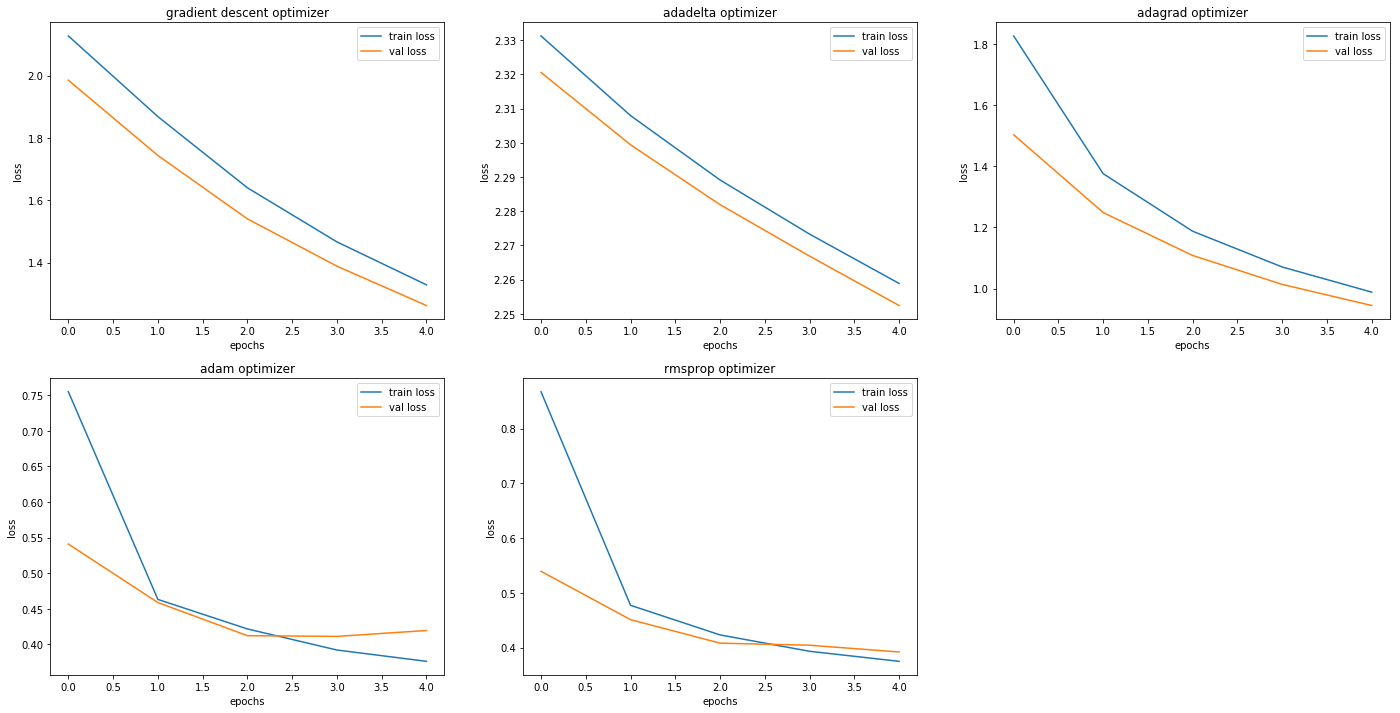

In [22]:
plt.figure(figsize=(24,12))
plot_train_val_curve(gd_history, 'gradient descent optimizer', (2, 3, 1))
plot_train_val_curve(adadelta_history, 'adadelta optimizer', (2, 3, 2))
plot_train_val_curve(adagrad_history, 'adagrad optimizer', (2, 3, 3))
plot_train_val_curve(adam_history, 'adam optimizer', (2, 3, 4))
plot_train_val_curve(rmsprop_history, 'rmsprop optimizer', (2, 3, 5))

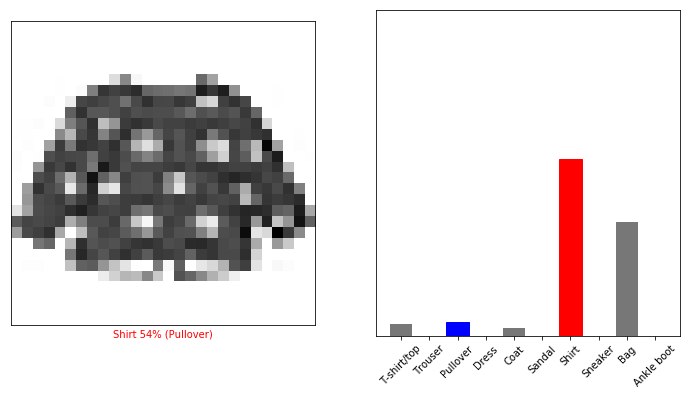

In [94]:
plot_random_predictions(test_images, test_labels, predictions)